# Entendimiendo de los datos - EDA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import matplotlib

## Carga de datos

In [67]:
csv_path = Path(r"e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\data-science-project\data\raw\enhanced_anxiety_dataset.csv")

df_Axd_Sint= pd.read_csv(csv_path, encoding="utf-8-sig")

df_Axd_Sint.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [68]:
df_Axd_Sint.shape

(11000, 19)

In [69]:
csv_path = Path(r"e:\Maestría_Eafit2024\Maestria\Trabajo de grado\DataLab2\archive\data-science-project\data\raw\family_anxiety_14_dataset.csv")

df_Axd_Fam = pd.read_csv(csv_path, encoding="utf-8-sig")

df_Axd_Fam.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,58,Male,Nurse,6.2,1.3,192,16,No,Yes,1,117,21,1,No,Yes,9,No,1,3.0
1,39,Female,Engineer,8.6,3.8,367,15,No,No,10,113,14,3,Yes,Yes,6,Yes,3,4.0
2,42,Female,Doctor,6.6,0.5,132,1,No,No,10,79,20,1,Yes,No,1,No,6,6.0
3,43,Female,Athlete,7.0,1.6,361,15,No,No,4,69,25,2,Yes,No,5,Yes,10,2.0
4,55,Other,Athlete,7.6,2.8,531,0,No,No,3,65,12,4,No,No,6,Yes,4,4.0


In [70]:
df_Axd_Fam.shape

(11000, 19)

In [71]:
# Resumen inicial de columnas, no-nulos y tipos
summary = (
    pd.DataFrame({
        "Column": df_health.columns,
        "Non-Null Count": df_health.notna().sum().values,
        "Dtype": df_health.dtypes.astype(str).values,
    })
)
summary


,Column,Non-Null Count,Dtype
0,Age,22000,float64
1,Gender,22000,object
2,Occupation,22000,object
3,Sleep Hours,22000,int32
4,Physical Activity (hrs/week),22000,int32
5,Caffeine Intake (mg/day),22000,float64
6,Alcohol Consumption (drinks/week),22000,int64
7,Smoking,22000,object
8,Family History of Anxiety,22000,object
9,Stress Level (1-10),22000,int64


## Análisis exploratorio

In [72]:
## Analisis inicial
def analysis_cat(df):
    return pd.concat([df.dtypes, df.nunique(), df.isna().sum()], axis = 1).rename({0:'datatype', 1:'unique', 2:'missing'}).T



In [73]:
analysis_cat(df_Axd_Sint)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,int64,object,object,float64,float64,int64,int64,object,object,int64,int64,int64,int64,object,object,int64,object,int64,float64
1,47,3,13,82,100,600,20,2,2,10,60,18,5,2,2,13,2,10,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
analysis_cat(df_Axd_Fam)    

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,int64,object,object,float64,float64,int64,int64,object,object,int64,int64,int64,int64,object,object,int64,object,int64,float64
1,47,3,13,109,102,600,20,2,2,10,60,18,5,2,2,10,2,10,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
## Consolidacion de dataset

df_health = pd.concat([df_Axd_Fam, df_Axd_Sint]).reset_index().drop('index', axis = 1).copy()
df_health.head(5)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,58,Male,Nurse,6.2,1.3,192,16,No,Yes,1,117,21,1,No,Yes,9,No,1,3.0
1,39,Female,Engineer,8.6,3.8,367,15,No,No,10,113,14,3,Yes,Yes,6,Yes,3,4.0
2,42,Female,Doctor,6.6,0.5,132,1,No,No,10,79,20,1,Yes,No,1,No,6,6.0
3,43,Female,Athlete,7.0,1.6,361,15,No,No,4,69,25,2,Yes,No,5,Yes,10,2.0
4,55,Other,Athlete,7.6,2.8,531,0,No,No,3,65,12,4,No,No,6,Yes,4,4.0


In [76]:
df_health.shape

(22000, 19)

In [77]:
analysis_cat(df_health) 

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,int64,object,object,float64,float64,int64,int64,object,object,int64,int64,int64,int64,object,object,int64,object,int64,float64
1,47,3,13,109,105,600,20,2,2,10,60,18,5,2,2,13,2,10,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
df_health.duplicated().sum()

0

## Separación de variables por tipo: Categoricas, numericas y discretas

In [79]:
## Sepacion de variables numericas y categoricas

df_col_num = df_health.select_dtypes(['int64', 'float64']).columns.copy()
df_col_cat = df_health.select_dtypes('object').columns.copy()

In [80]:
## Clasificacion de variables numericas
## Por escalas, lista de variables

df_col_num_disc = ['Stress Level (1-10)', 'Sweating Level (1-5)',
                   'Diet Quality (1-10)', 'Anxiety Level (1-10)'] # Few unique values
df_col_num_med = ['Alcohol Consumption (drinks/week)',
                  'Breathing Rate (breaths/min)',
                  'Therapy Sessions (per month)']
df_col_num_cont = df_health[df_col_num].drop(df_col_num_disc,axis =1).drop(df_col_num_med, axis = 1).columns.copy()

In [81]:
##Lista de variables numéricas discretas, es decir, variables con valores únicos

analysis_cat(df_health[df_col_num_disc])

,Stress Level (1-10),Sweating Level (1-5),Diet Quality (1-10),Anxiety Level (1-10)
0,int64,int64,int64,float64
1,10,5,10,10
2,0,0,0,0


In [82]:
##Lista de variables numéricas de tipo "media" o intermedias, que representan cantidades contables o tasas 


analysis_cat(df_health[df_col_num_med])

,Alcohol Consumption (drinks/week),Breathing Rate (breaths/min),Therapy Sessions (per month)
0,int64,int64,int64
1,20,18,13
2,0,0,0


In [83]:
###Calcula las variables numéricas continuas.Lo hace tomando todas las columnas numéricas (df_col_num) y eliminando las que están en df_col_num_disc y df_col_num_med.
#El resultado es una lista de nombres de columnas que representan variables numéricas continuas (con muchos valores posibles).

analysis_cat(df_health[df_col_num_cont])

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Heart Rate (bpm)
0,int64,float64,float64,int64,int64
1,47,109,105,600,60
2,0,0,0,0,0


In [84]:
## Analisis de variables categoricas

analysis_cat(df_health[df_col_cat])

,Gender,Occupation,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
0,object,object,object,object,object,object,object
1,3,13,2,2,2,2,2
2,0,0,0,0,0,0,0


## Analisis exploratorio

In [85]:
##Preparacion de datos para analisis
# Turning numbers into scientific notation
# For smaller numbers
# if p value is 0, then the computer can't reach number that small
def scien_not(num, dec):
    science = ('%E' % num).split('E')
    return str(round(float(science[0]), dec)) + '*10^' + str(int(science[1]))

In [86]:
from scipy.stats import chi2_contingency

def chi2_con(tabla):
    """Calcula el test chi-cuadrado de independencia para una tabla de contingencia."""
    chi2, p, dof, expected = chi2_contingency(tabla)
    # Devuelve un objeto simple con atributo pvalue para compatibilidad con el código existente
    class Result:
        def __init__(self, pvalue):
            self.pvalue = pvalue
    return Result(p)

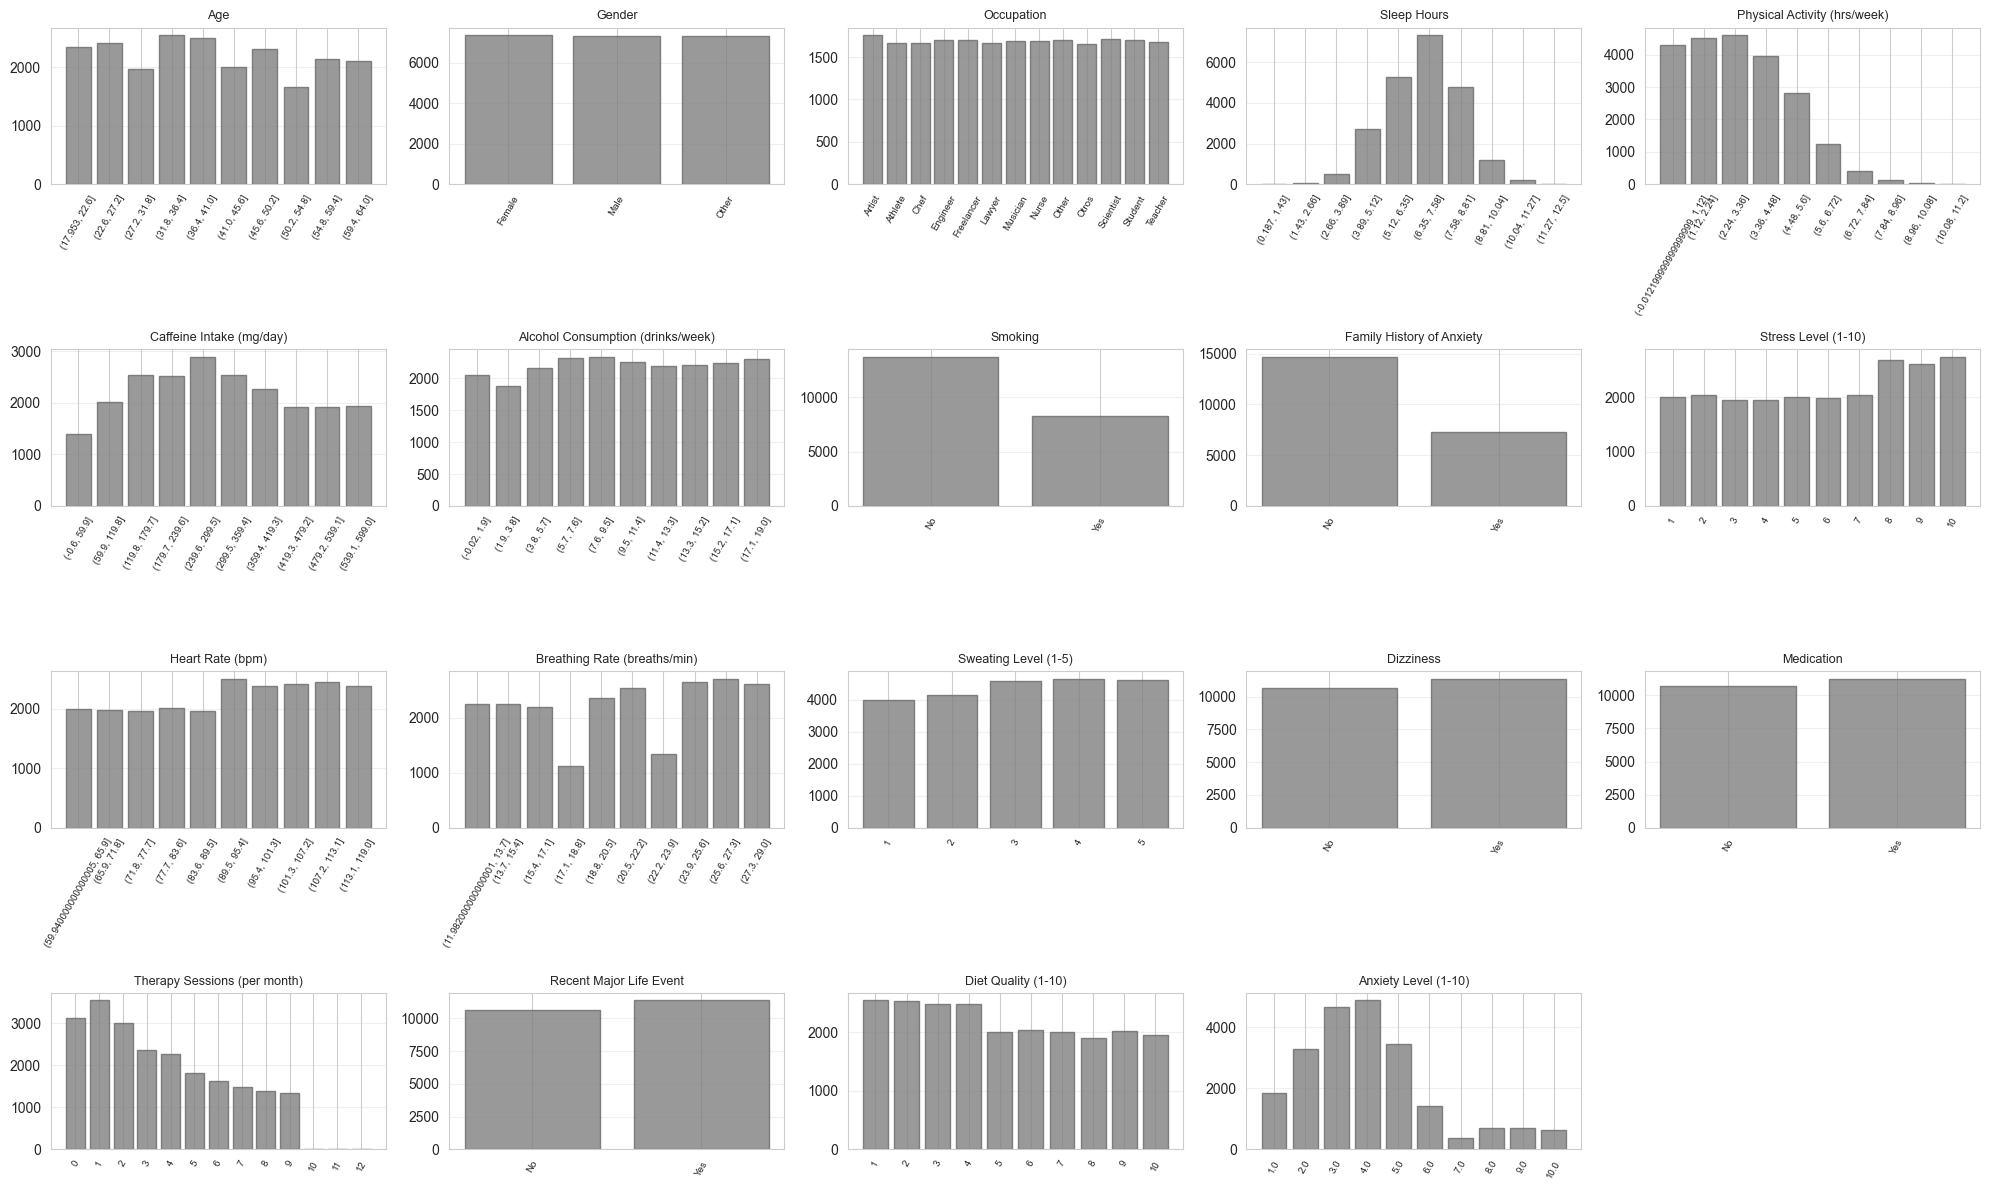

In [87]:
import math

def plot_compact_bars(df):
    cols = df.columns
    n = len(cols)
    ncol = math.ceil(math.sqrt(n))
    nrow = math.ceil(n / ncol)

    fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        s = df[col]
        # Ajuste de detalle: binning para muchas categorías/números
        if pd.api.types.is_numeric_dtype(s):
            if s.nunique(dropna=True) > 15:
                vc = pd.cut(s, bins=10, include_lowest=True).value_counts().sort_index()
            else:
                vc = s.value_counts(dropna=False).sort_index()
        else:
            vc = s.value_counts(dropna=False)
            if len(vc) > 12:
                top = vc.head(12)
                vc = pd.concat([top, pd.Series({'Otros': vc.iloc[12:].sum()})])

        vc = vc.sort_index()
        ax.bar([str(i) for i in vc.index], vc.values, color='gray', edgecolor='dimgray', alpha=0.8)
        ax.set_title(col, fontsize=9)
        ax.tick_params(axis='x', labelrotation=60, labelsize=7)
        ax.grid(axis='y', alpha=0.3)

    # Oculta ejes sobrantes si la cuadrícula es mayor que el número de columnas
    for ax in axes[len(cols):]:
        ax.axis('off')

    fig.tight_layout()
    plt.show()

plot_compact_bars(df_health)


### Analisis: escalas numericas

Este código es una visualización cruzada de variables discretas numéricas contenidas en un DataFrame llamado df_health, usando matplotlib. Sirve para:

-Visualizar distribuciones (cuando se cruza una variable consigo misma).
-Visualizar tablas de contingencia (frecuencias cruzadas) con anotaciones y colores.
-Evaluar relaciones estadísticas (p-valores del test chi-cuadrado) entre pares de variables.


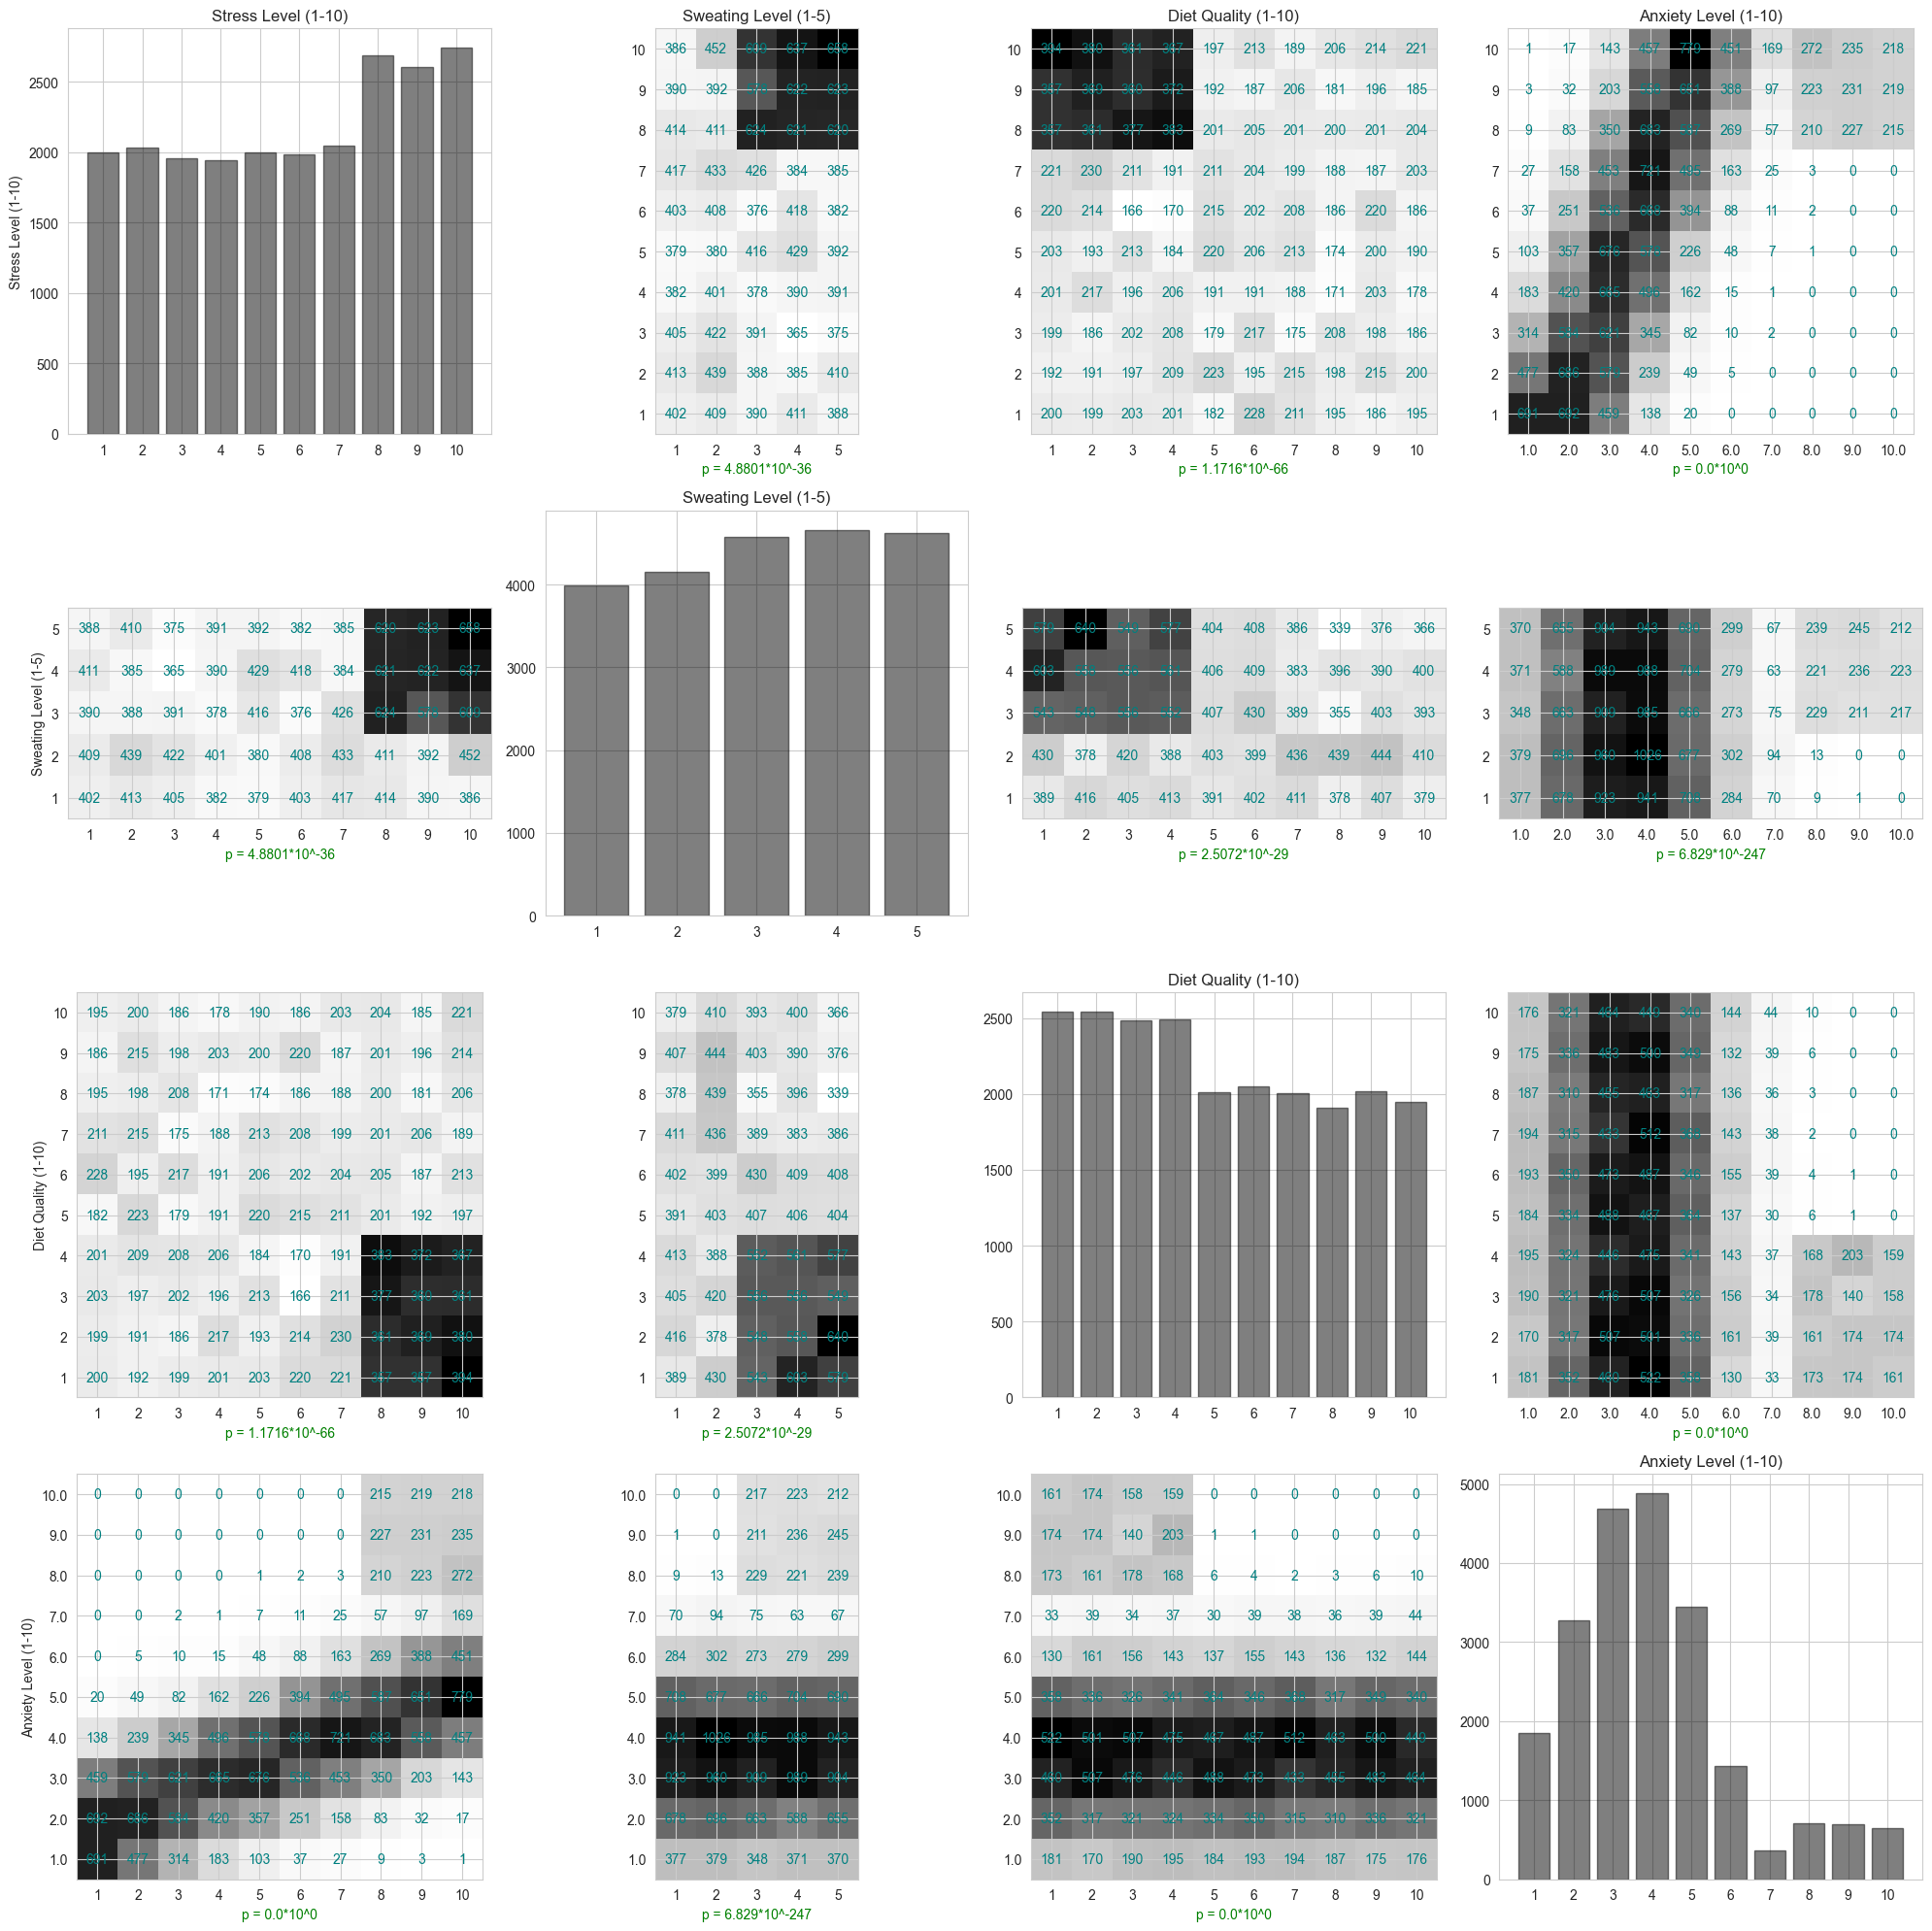

In [88]:

plt.figure(figsize = (20, 20))
count = 0
size_1 = 4
size_2 = 4
for i in df_col_num_disc:
    for j in df_col_num_disc:
        count += 1
        plt.subplot(size_1, size_2, count)
        if count <= size_2:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            val_con = df_health[i].value_counts()
            plt.bar(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(val_con.index)
        if i != j:
            data = pd.crosstab(df_health[i], df_health[j]).loc[df_health[i].value_counts().sort_index(ascending = False).index]
            plt.imshow(data, cmap = 'Greys')
            plt.yticks(ticks = [i for i in range(0, df_health[i].nunique())],
                       labels = df_health[i].value_counts().sort_index(ascending = False).index)
            plt.xticks(ticks = [i for i in range(0, df_health[j].nunique())],
                       labels = df_health[j].value_counts().sort_index().index)
            x = 0
            for m in data.columns:
                y = 0
                for n in data.index:
                    plt.text(x, y, data[m][n], ha = 'center', va = 'center', color = 'teal')
                    y += 1
                x += 1
            chi2_p = chi2_con(pd.crosstab(df_health[i], df_health[j])).pvalue
            if chi2_p >= 0.05:
                color = 'red'
            if chi2_p < 0.05:
                color = 'green'
            plt.xlabel('p = ' + scien_not(chi2_p, 4), color = color)
plt.tight_layout()
plt.show()


### Analisis: Variables medias

Visualiza la distribución y relación estadística entre todas las variables numéricas medias, mostrando tanto la fuerza de la relación (p-valor) como la frecuencia de combinaciones de valores. Es útil para análisis exploratorio y detección de asociaciones entre variables.

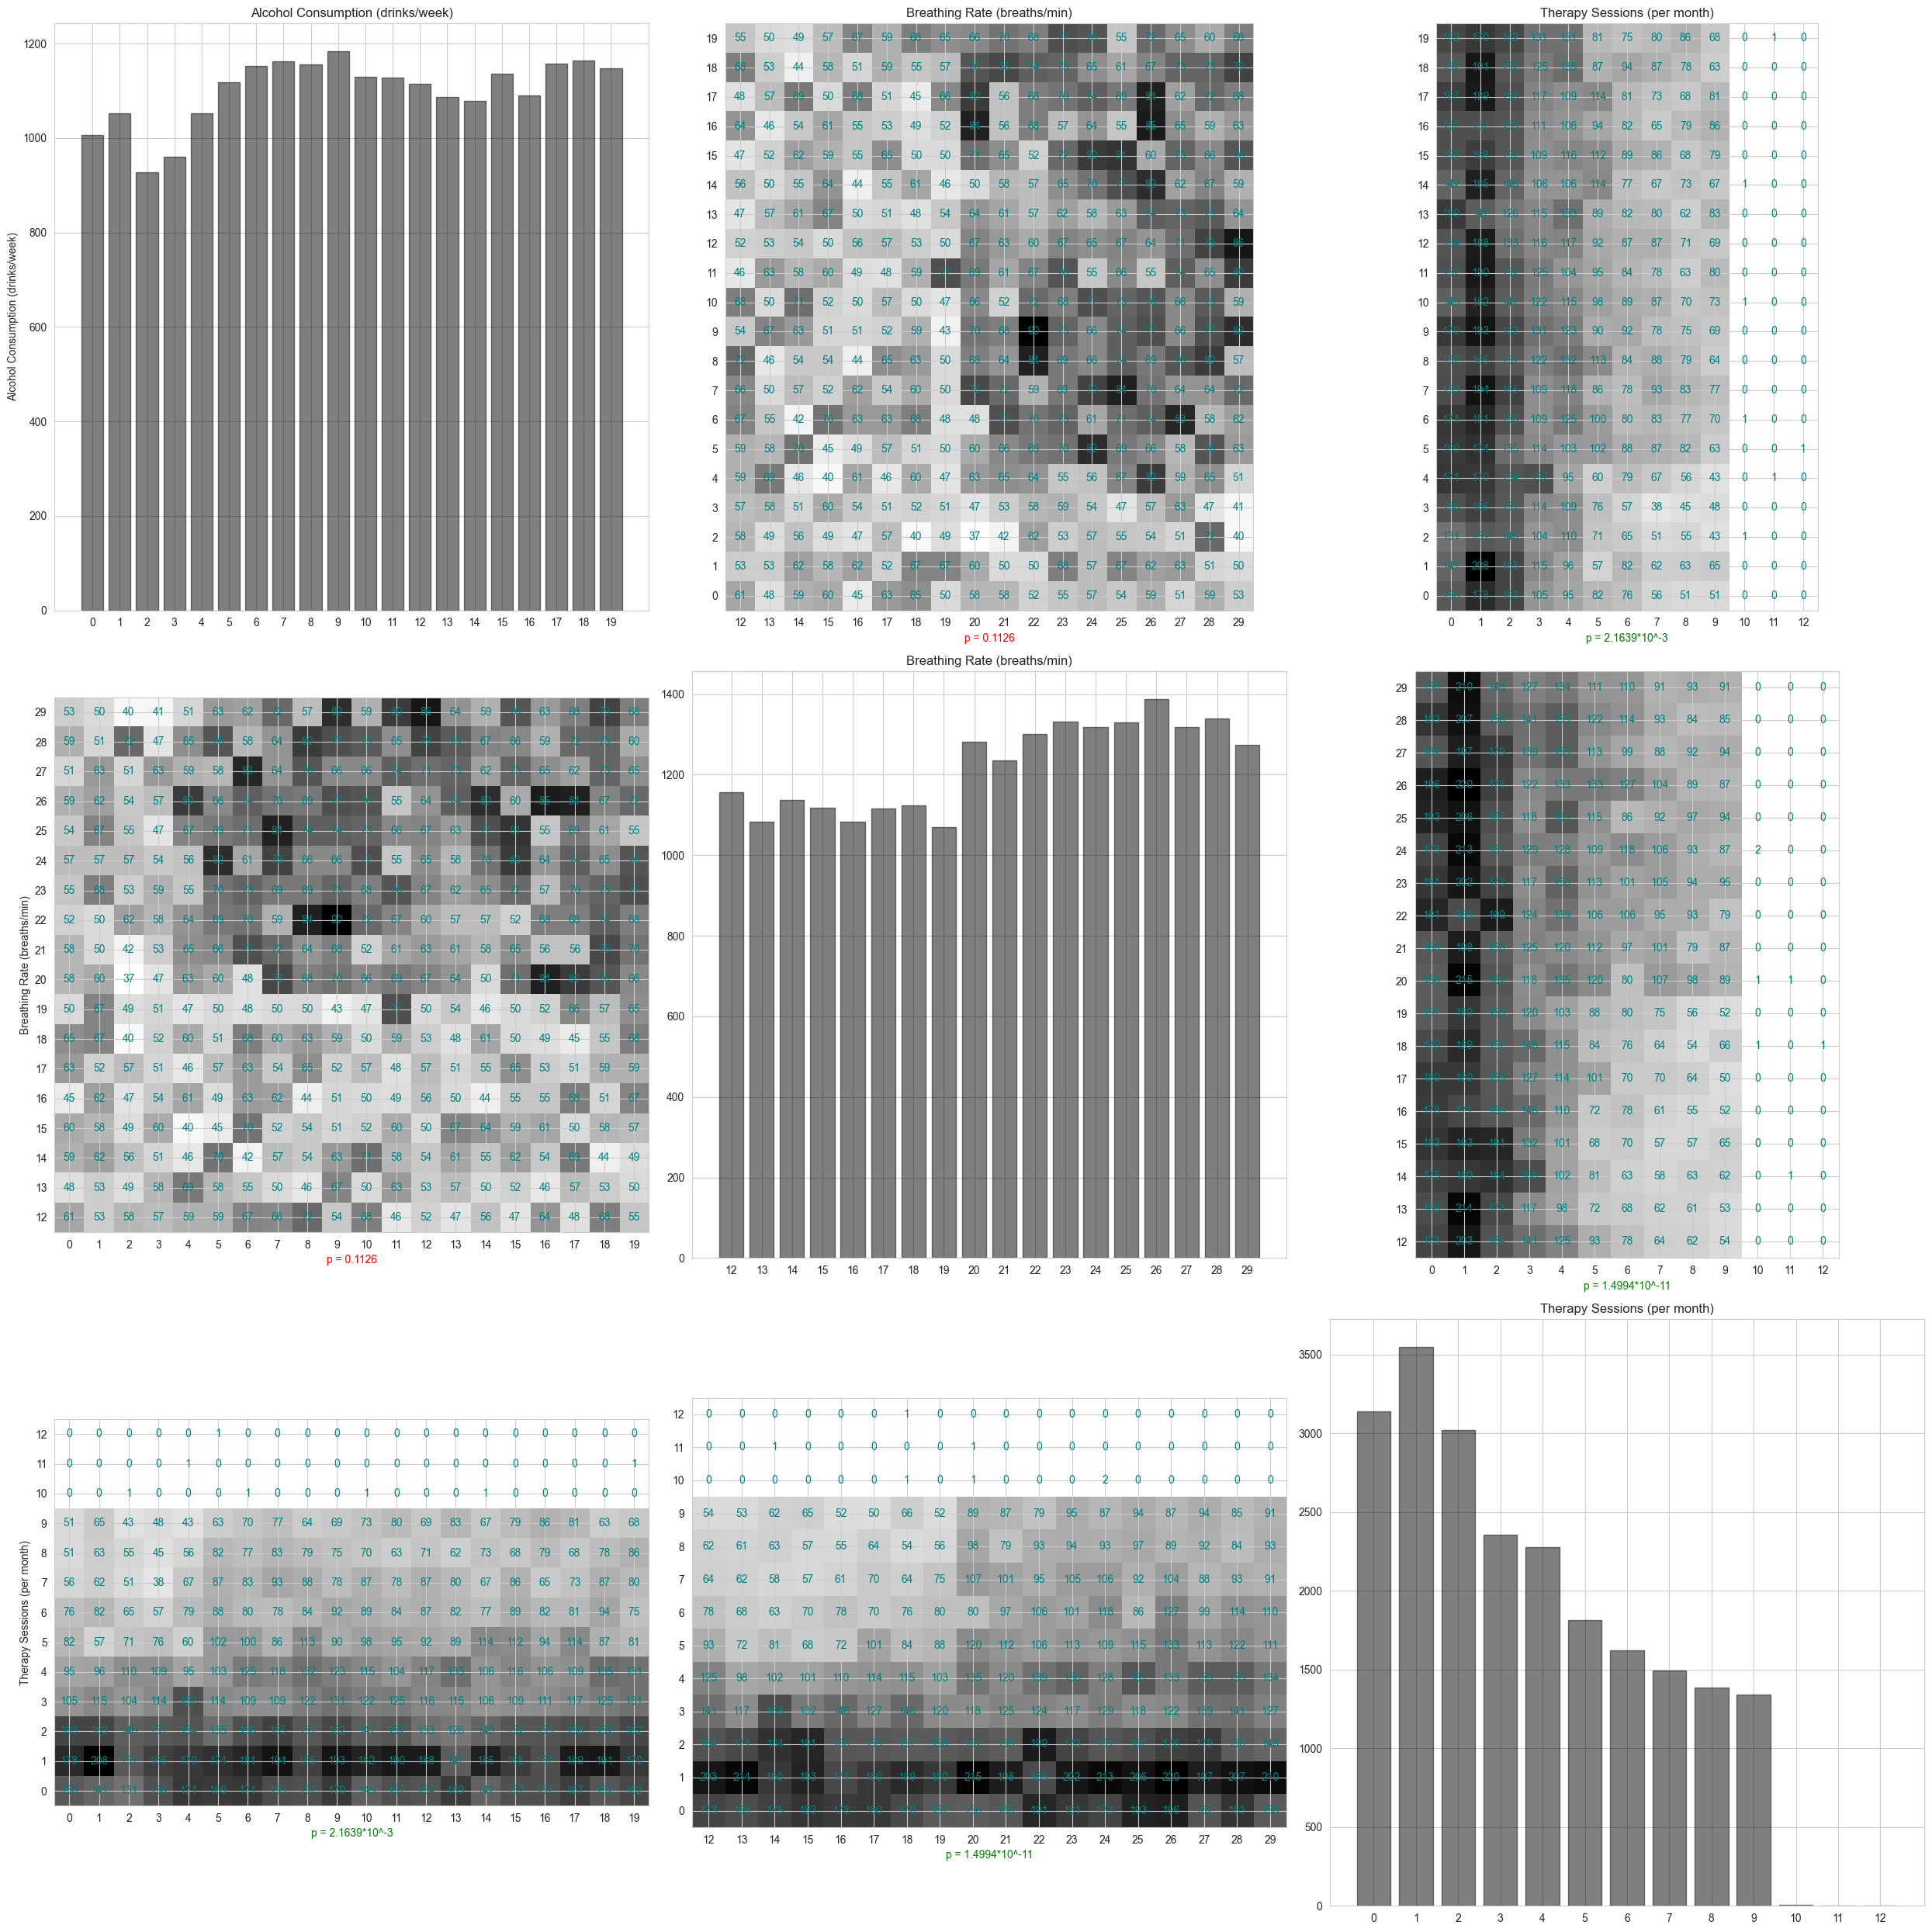

In [89]:

plt.figure(figsize = (25, 25))
count = 0
size_1 = 3
size_2 = 3
for i in df_col_num_med:
    for j in df_col_num_med:
        count += 1
        plt.subplot(size_1, size_2, count)
        if count <= size_1:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            val_con = df_health[i].value_counts()
            plt.bar(val_con.index,val_con, color = 'black',alpha =0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(val_con.index)
        if i != j:
            data = pd.crosstab(df_health[i], df_health[j]).loc[df_health[i].value_counts().sort_index(ascending = False).index]
            plt.imshow(data, cmap = 'Greys')
            plt.yticks(ticks = [i for i in range(0, df_health[i].nunique())],
                       labels = df_health[i].value_counts().sort_index(ascending = False).index)
            plt.xticks(ticks = [i for i in range(0, df_health[j].nunique())],
                       labels = df_health[j].value_counts().sort_index().index)
            x = 0
            for m in data.columns:
                y = 0
                for n in data.index:
                    plt.text(x, y, data[m][n], ha = 'center', va = 'center', color = 'teal')
                    y += 1
                x += 1
            chi2_p = chi2_con(pd.crosstab(df_health[i], df_health[j])).pvalue
            if chi2_p >= 0.05:
                color = 'red'
                valing = str(round(chi2_p, 4))
            if chi2_p < 0.05:
                color = 'green'
                valing = scien_not(chi2_p, 4)
            plt.xlabel('p = ' + valing, color = color)
plt.tight_layout()
plt.show()


### Analisis: variables en rangos

In [90]:
df_health[df_col_num_cont].describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Heart Rate (bpm)
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000
mean,40.328273,6.711559,2.929300,299.690682,90.955000
std,13.292906,1.435776,1.832344,160.062495,17.232164
min,18.000000,0.200000,0.000000,0.000000,60.000000
25%,29.000000,5.800000,1.500000,168.000000,76.000000
50%,40.000000,6.800000,2.800000,292.000000,92.000000
75%,51.000000,7.700000,4.200000,429.000000,106.000000
max,64.000000,12.500000,11.200000,599.000000,119.000000


In [91]:
bin_cont = {
    'Age' : [18, 25, 35, 45, 55, 65],
    'Sleep Hours' : [i for i in range(0, 14)],
    'Physical Activity (hrs/week)' : [i for i in range(0, 13)],
    'Caffeine Intake (mg/day)' : [i * 100 for i in range(0, 7)],
    'Heart Rate (bpm)' : [60 + (i * 10) for i in range(0, 7)]
}

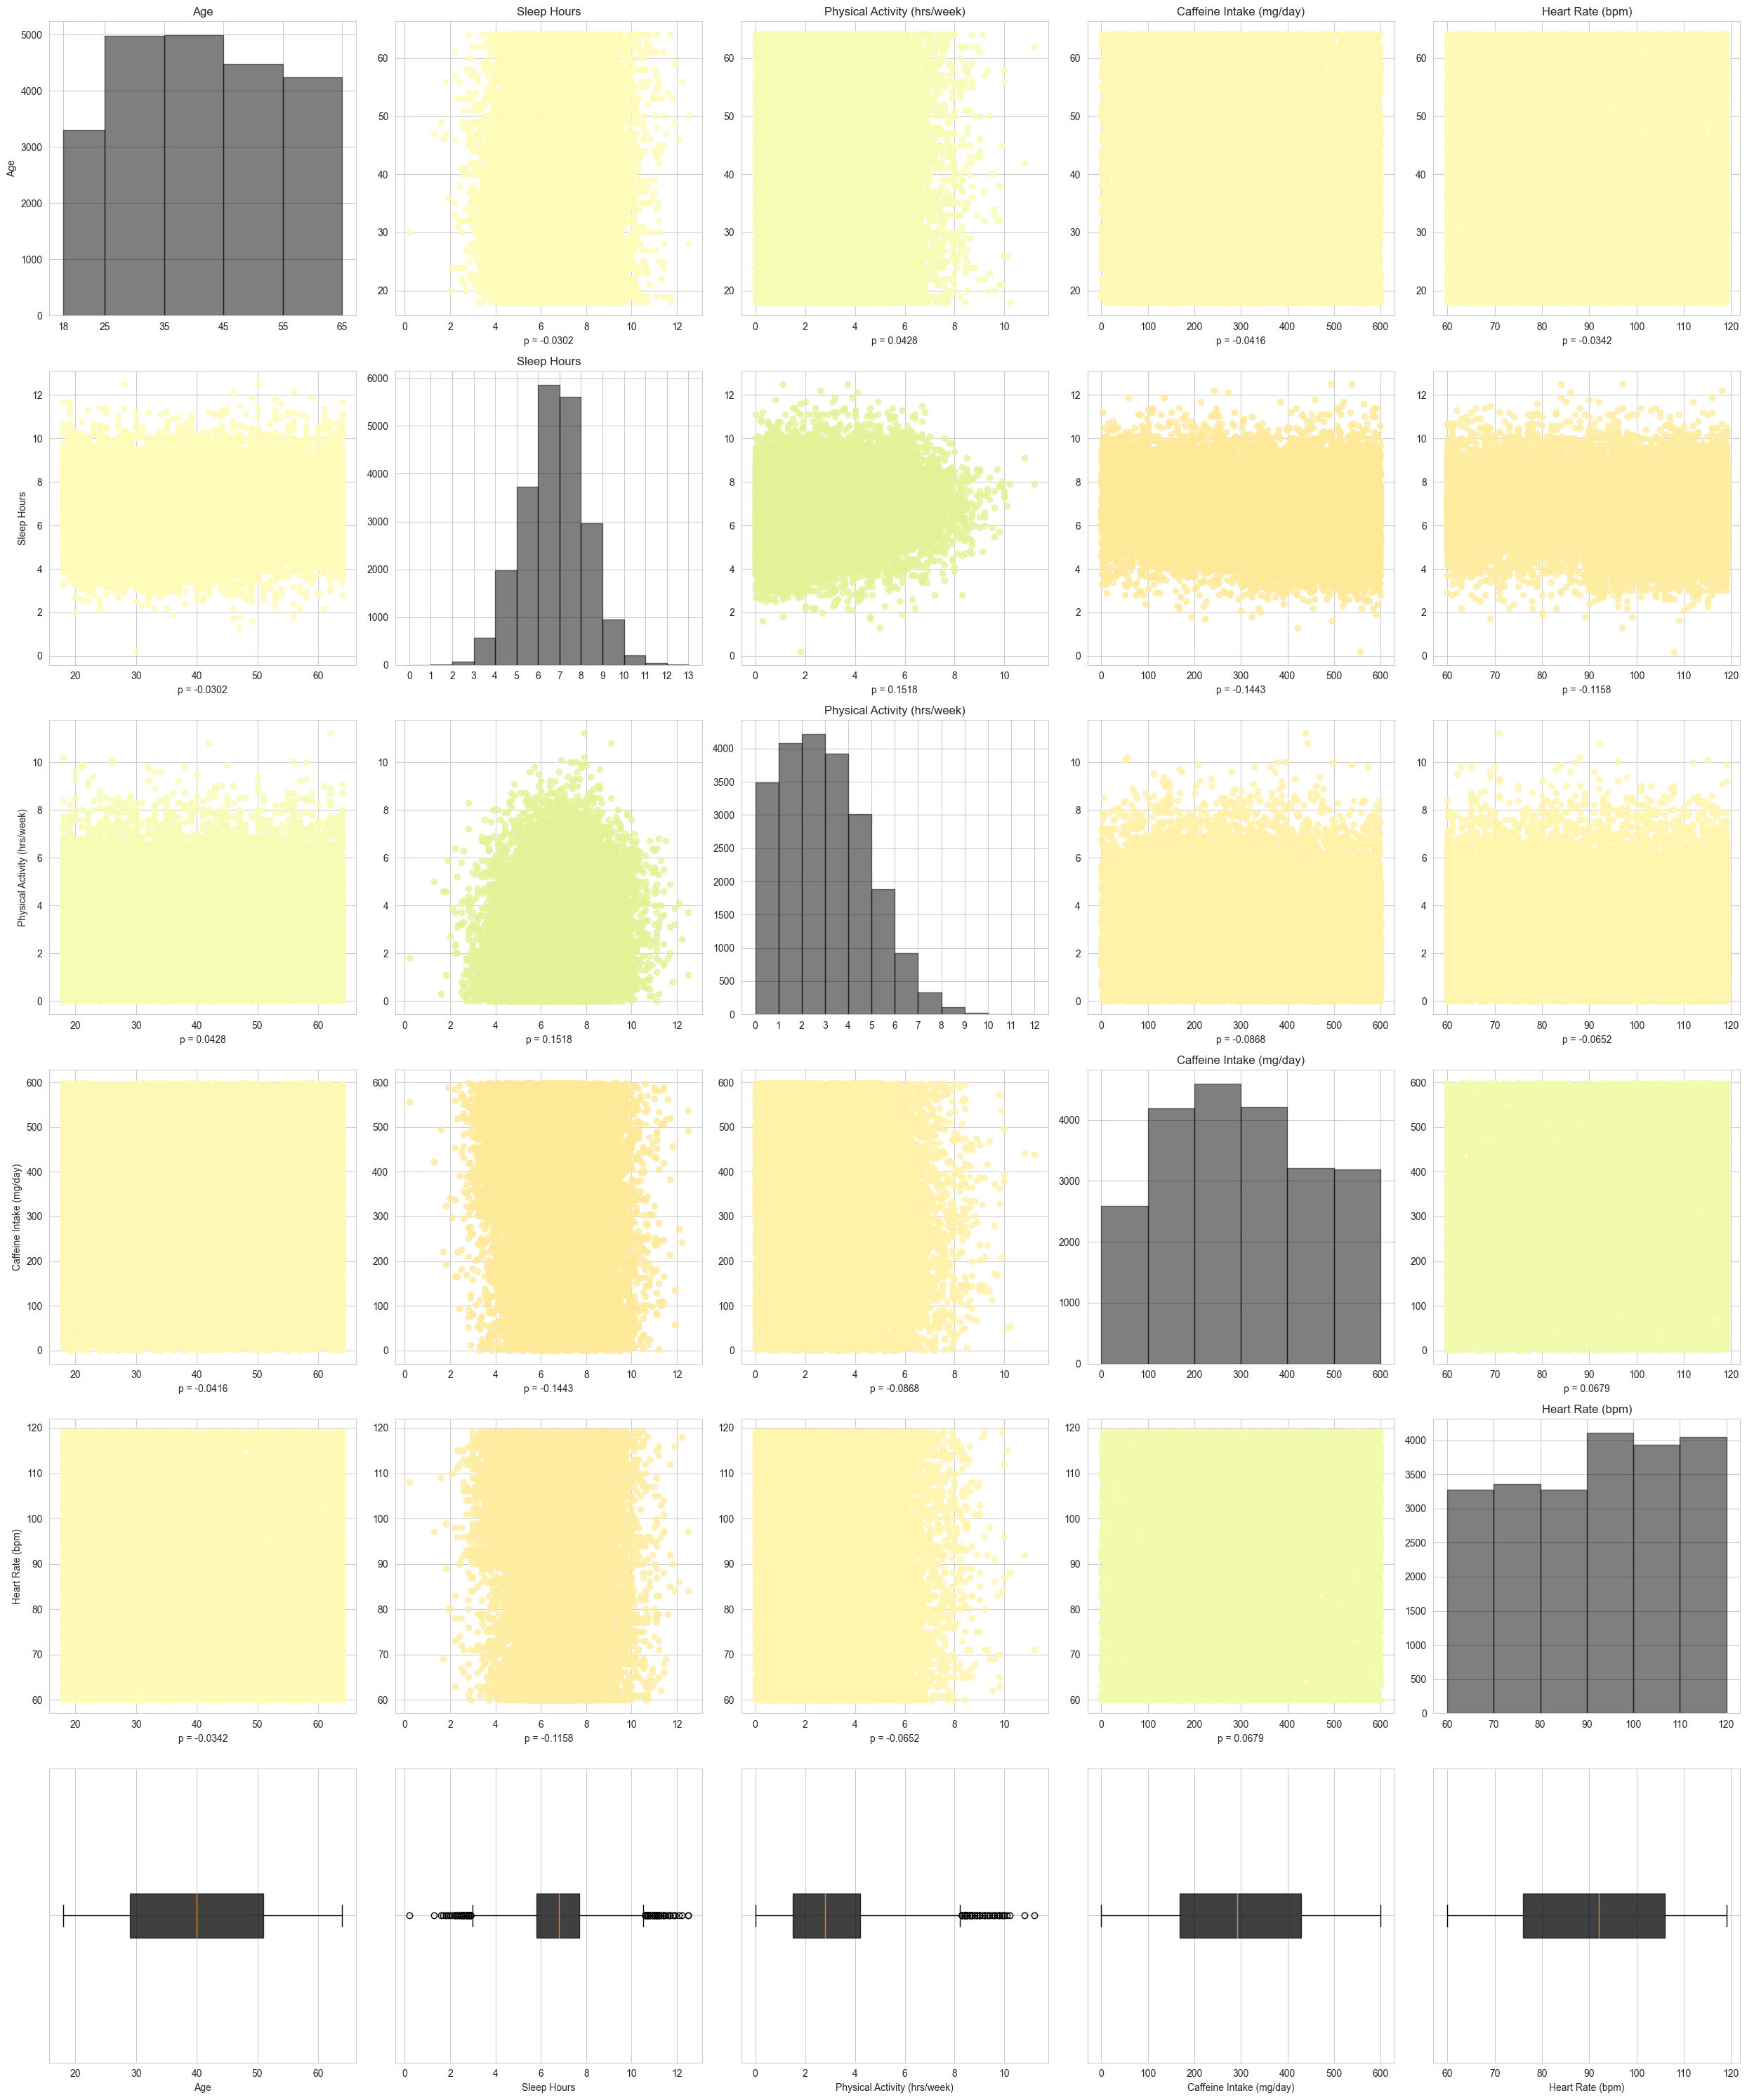

In [92]:
# Correlation between numerical value
# Red = negative corr; Yellow = no corr; Green = positive corr
ryg = matplotlib.colormaps['RdYlGn']
plt.figure(figsize = (25, 30))
count = 0
size_1 = 5
size_2 = 5
for i in df_col_num_cont:
    for j in df_col_num_cont:
        count += 1
        plt.subplot(size_1 + 1, size_2, count)
        if count <= size_1:
            plt.title(j)
        if (count % size_1) ==1:
            plt.ylabel(i)
        if i == j:
            plt.title(j)
            plt.hist(df_health[i], bins = bin_cont[i],color = 'black', alpha = 0.5, edgecolor = 'black', zorder = 2)
            plt.grid(axis = 'y', zorder = 1)
            plt.xticks(bin_cont[i])
        if i != j:
            corr_value = df_health[j].corr(df_health[i])
            color = ryg((corr_value + 1) / 2)
            plt.scatter(df_health[j], df_health[i], color = color, alpha =0.75)
            plt.xlabel('p = ' + str(round(corr_value, 4)))
for i in df_col_num_cont:
    count += 1
    plt.subplot(size_1 + 1, size_2, count)
    plt.boxplot(df_health[i], vert = False, zorder = 2, patch_artist = True,
                boxprops = dict(facecolor = 'black', alpha = 0.75))
    plt.grid(axis = 'x', zorder = 1)
    plt.yticks(ticks = [1], labels = [' '], rotation = 90, va = 'center')
    plt.xlabel(i)
plt.tight_layout()
plt.show()


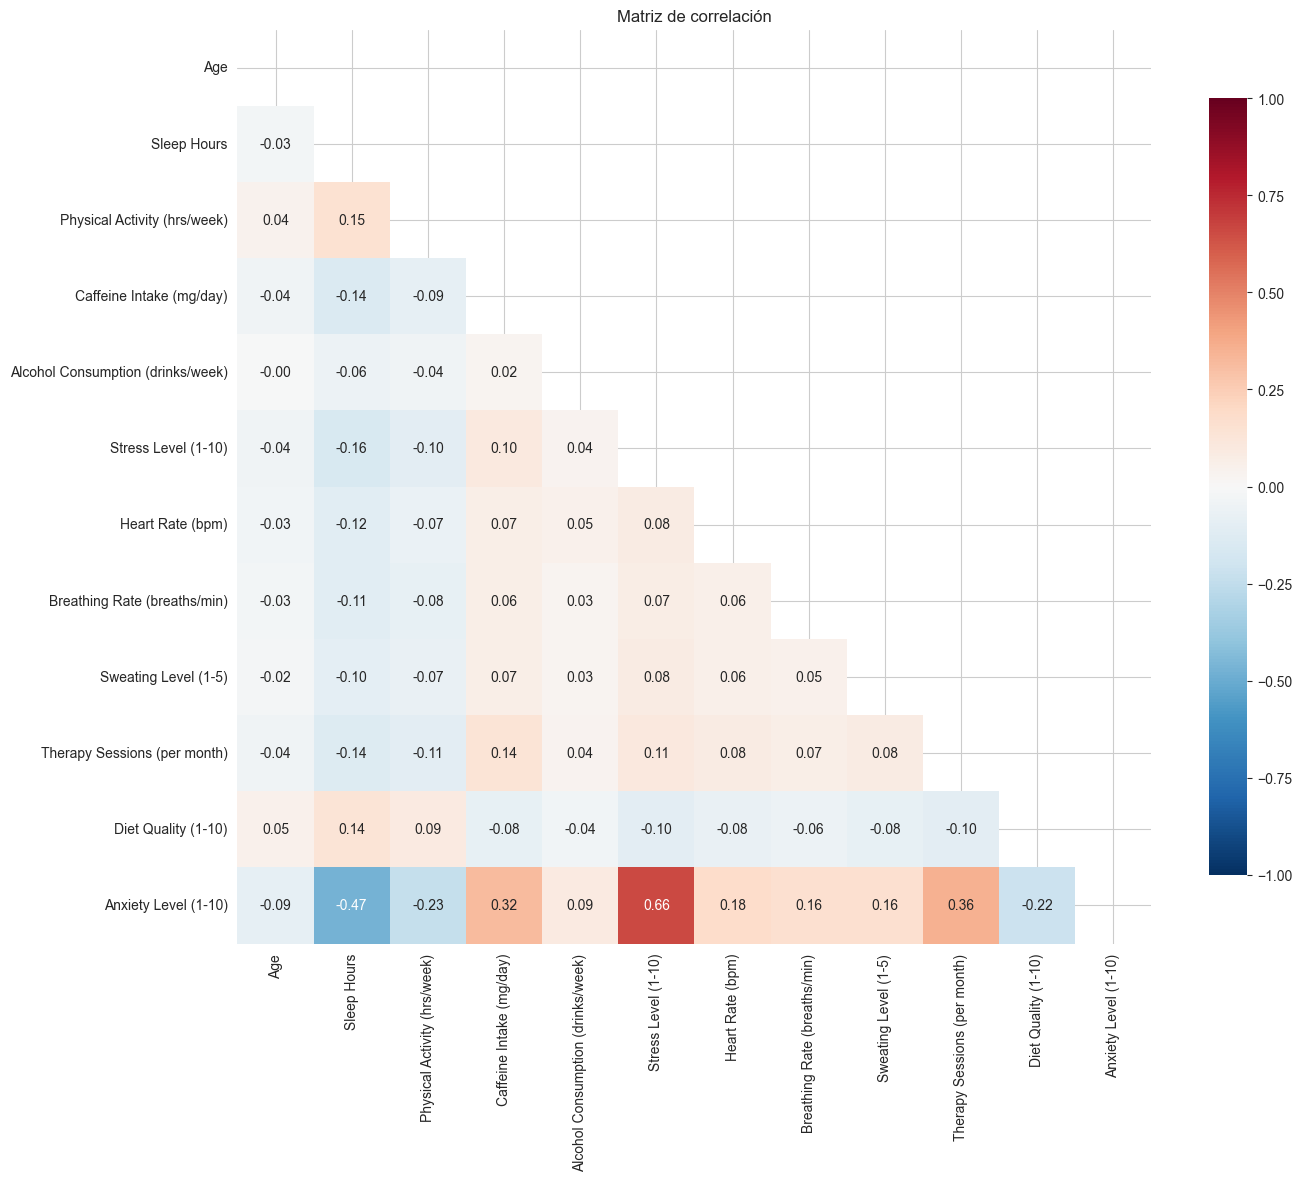

In [93]:
# Correlación antes de la preparación (solo variables numéricas crudas)
import seaborn as sns

df_num_raw = df_health.select_dtypes(include=["int64", "float64"]).copy()
corr_raw = df_num_raw.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_raw, dtype=bool))
sns.heatmap(
    corr_raw,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


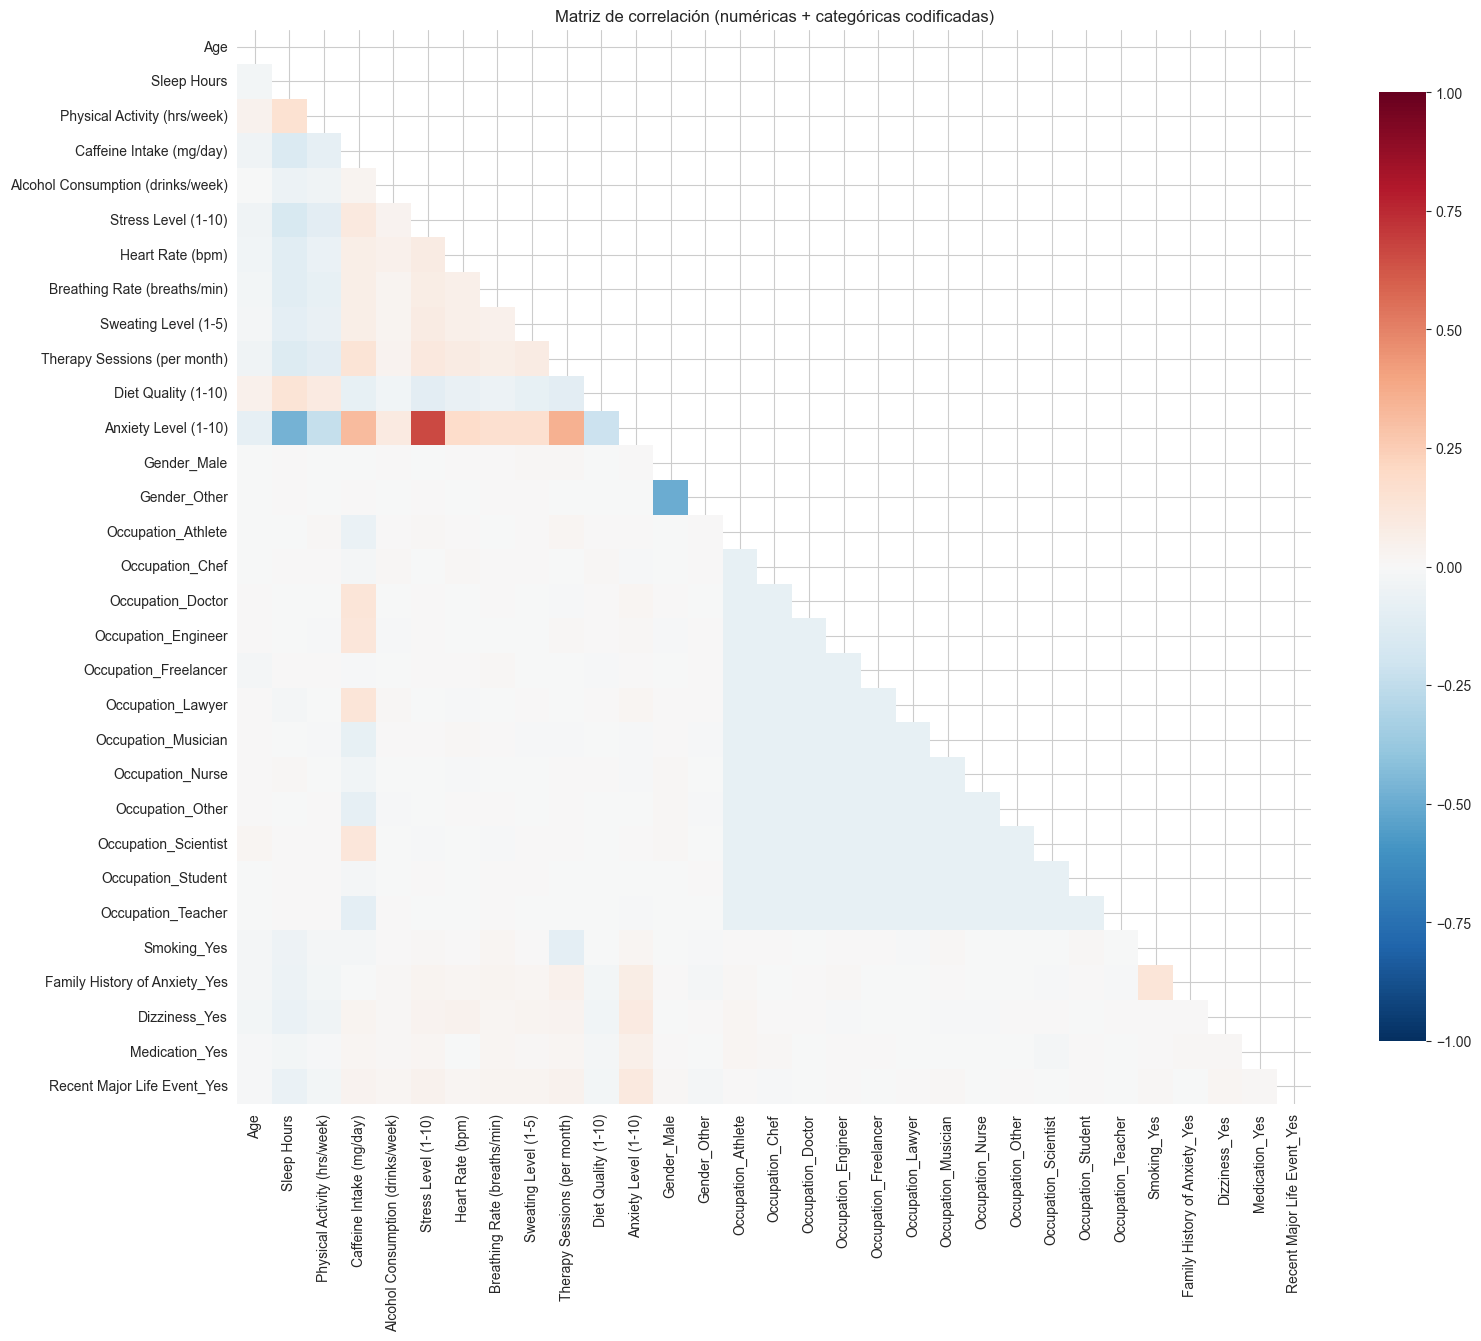

In [94]:
df_raw_encoded = pd.get_dummies(df_health, drop_first=True)
corr_raw_full = df_raw_encoded.corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_raw_full, dtype=bool))
sns.heatmap(
    corr_raw_full,
    mask=mask,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Matriz de correlación (numéricas + categóricas codificadas)")
plt.tight_layout()
plt.show()


## Prepracion de los datos

### Deteccion de outliers

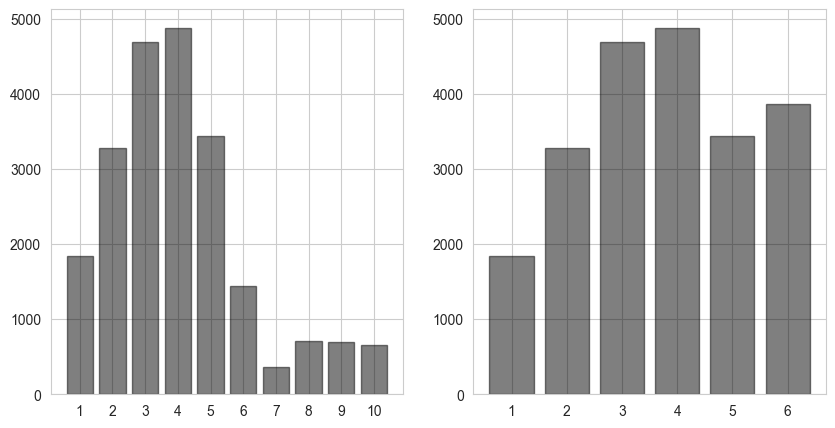

In [95]:
 ##Cambiando los niveles de ansiedad de 1-10 a 1-6
 
plt.figure(figsize = (10, 5))
val_con = df_health['Anxiety Level (1-10)'].value_counts()
plt.subplot(1, 2, 1)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)

val_con = df_health['Anxiety Level (1-10)'].replace([6, 7, 8, 9, 10], 6).value_counts()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.show()

In [96]:
df_health['Anxiety Level (1-10)'] = df_health['Anxiety Level (1-10)'].replace([6, 7, 8, 9, 10], 6)

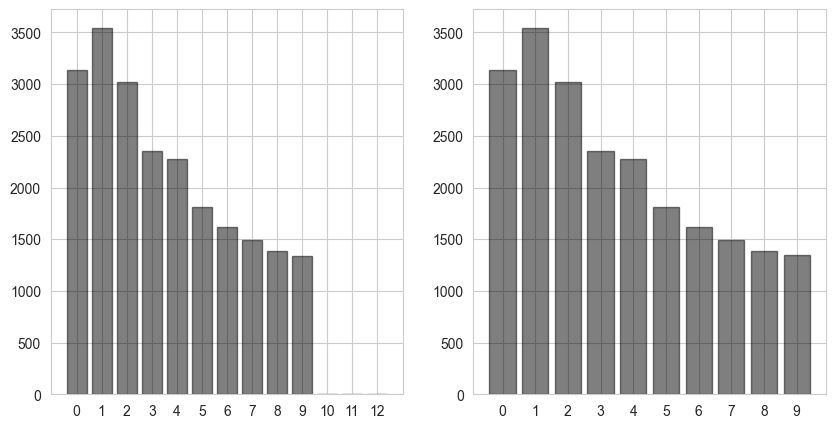

In [97]:
## cambiando las sesiones de terapia de 0 a 12 a 0 a 9 (o más de 9)

plt.figure(figsize = (10, 5))
val_con = df_health['Therapy Sessions (per month)'].value_counts()
plt.subplot(1, 2, 1)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)

val_con = df_health['Therapy Sessions (per month)'].replace([10, 11, 12], 9).value_counts()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks(val_con.index)
plt.show()

In [98]:
df_health['Therapy Sessions (per month)'] = df_health['Therapy Sessions (per month)'].replace([10, 11, 12], 9)

In [99]:
df_col_num_cont

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Heart Rate (bpm)'],
      dtype='object')

In [100]:
df_health['Sleep Hours'].describe()

count    22000.000000
mean         6.711559
std          1.435776
min          0.200000
25%          5.800000
50%          6.800000
75%          7.700000
max         12.500000
Name: Sleep Hours, dtype: float64

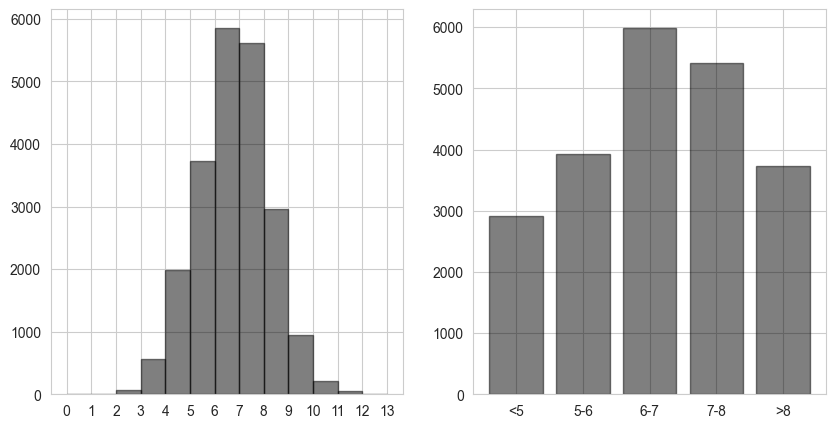

In [101]:

# Cambiando las horas de sueño en intervalos de (<5, 5-6, 6-7, 7-8, >8) (lo que se traduciría en 0, 1, 2, 3, 4)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_health['Sleep Hours'], bins = [i for i in range(0, 14)], edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks([i for i in range(0, 14)])

val_con = pd.cut(df_health['Sleep Hours'], [-1, 5, 6, 7, 8, 13], labels = ['<5', '5-6', '6-7', '7-8', '>8']).value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
#plt.xticks(ticks = []val_con.index)
plt.show()


In [102]:
df_health['Sleep Hours'] = pd.cut(df_health['Sleep Hours'], [-1, 5, 6, 7, 8, 13], labels = [0, 1, 2, 3, 4]).astype(int)

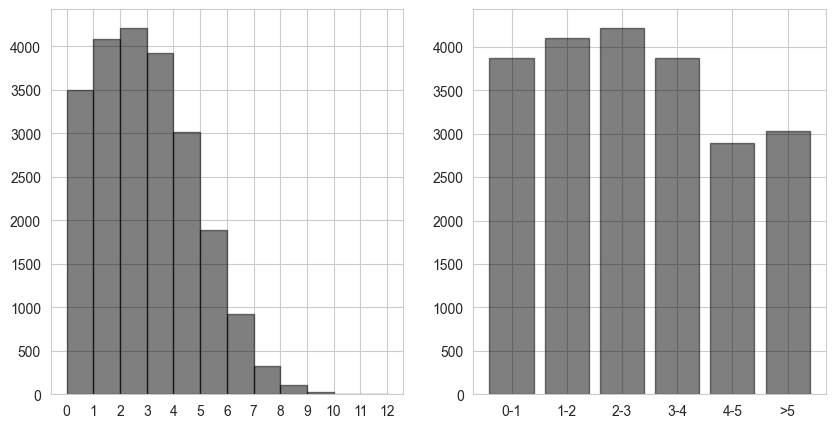

In [103]:


# Cambiando las horas de actividad fisica en intervalos de (0-1, 1-2, 2-3, 3-4, 4-5, >5) 
# ##(lo que se traduciría en 0, 1, 2, 3, 4, 5)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_health['Physical Activity (hrs/week)'], bins = [i for i in range(0, 13)], edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)
plt.xticks([i for i in range(0, 13)])

val_con = pd.cut(df_health['Physical Activity (hrs/week)'], [-1, 1, 2, 3, 4, 5, 12], labels = ['0-1','1-2', '2-3', '3-4', '4-5', '>5']).value_counts().sort_index()
plt.subplot(1, 2, 2)
plt.bar(val_con.index, val_con, edgecolor = 'black', facecolor = 'black', alpha = 0.5, zorder = 2)
plt.grid(axis = 'y' ,zorder = 1)

plt.show()


In [104]:
df_health['Physical Activity (hrs/week)'] = pd.cut(df_health['Physical Activity (hrs/week)'], [-1, 1, 2, 3, 4, 5, 12], labels = [0, 1, 2, 3, 4, 5]).astype(int)

### Normalización 

In [105]:
df_col_cat_dummy =  ['Gender', 'Occupation'] # Variable dummy

# Variable  categorica que se convertirá en binaria (True o False,)
df_col_cat_binary = ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']

# Normalizacion con MinMax
df_col_num_comb = df_col_num_disc + df_col_num_med + ['Sleep Hours', 'Physical Activity (hrs/week)']

# Reduccion de escala de las variables continuas
df_col_num_new_cont = ['Age', 'Caffeine Intake (mg/day)', 'Heart Rate (bpm)']

In [106]:
df_dummy = pd.get_dummies(df_health[df_col_cat_dummy])
df_dummy.head(5)

,Gender_Female,Gender_Male,Gender_Other,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False


In [107]:
df_binary = (df_health[df_col_cat_binary] == 'Yes').copy()
df_binary.head(5)

,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
0,False,True,False,True,False
1,False,False,True,True,True
2,False,False,True,False,False
3,False,False,True,False,True
4,False,False,False,False,True


In [108]:
df_health[df_col_num_new_cont].describe()

,Age,Caffeine Intake (mg/day),Heart Rate (bpm)
count,22000.000000,22000.000000,22000.000000
mean,40.328273,299.690682,90.955000
std,13.292906,160.062495,17.232164
min,18.000000,0.000000,60.000000
25%,29.000000,168.000000,76.000000
50%,40.000000,292.000000,92.000000
75%,51.000000,429.000000,106.000000
max,64.000000,599.000000,119.000000


In [109]:
#Reduccion de escala de las variables continuas

df_health['Age'] /= 10
df_health['Caffeine Intake (mg/day)'] /= 100
df_health['Heart Rate (bpm)'] /= 60
df_health[df_col_num_new_cont].describe()

,Age,Caffeine Intake (mg/day),Heart Rate (bpm)
count,22000.000000,22000.000000,22000.000000
mean,4.032827,2.996907,1.515917
std,1.329291,1.600625,0.287203
min,1.800000,0.000000,1.000000
25%,2.900000,1.680000,1.266667
50%,4.000000,2.920000,1.533333
75%,5.100000,4.290000,1.766667
max,6.400000,5.990000,1.983333


In [110]:
##Nuevo dataset consolidado

df_col_num_comb += df_col_num_new_cont
df_col_num_comb

['Stress Level (1-10)',
 'Sweating Level (1-5)',
 'Diet Quality (1-10)',
 'Anxiety Level (1-10)',
 'Alcohol Consumption (drinks/week)',
 'Breathing Rate (breaths/min)',
 'Therapy Sessions (per month)',
 'Sleep Hours',
 'Physical Activity (hrs/week)',
 'Age',
 'Caffeine Intake (mg/day)',
 'Heart Rate (bpm)']

### Escalamiento de variables con minmax

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
df_num = pd.DataFrame(MinMaxScaler().fit_transform(df_health[df_col_num_comb]), columns = df_col_num_comb)

In [113]:
df_num.head(5)

,Stress Level (1-10),Sweating Level (1-5),Diet Quality (1-10),Anxiety Level (1-10),Alcohol Consumption (drinks/week),Breathing Rate (breaths/min),Therapy Sessions (per month),Sleep Hours,Physical Activity (hrs/week),Age,Caffeine Intake (mg/day),Heart Rate (bpm)
0,0.000000,0.00,0.000000,0.4,0.842105,0.529412,1.000000,0.50,0.2,0.869565,0.320534,0.966102
1,1.000000,0.50,0.222222,0.6,0.789474,0.117647,0.666667,1.00,0.6,0.456522,0.612688,0.898305
2,1.000000,0.00,0.555556,1.0,0.052632,0.470588,0.111111,0.50,0.0,0.521739,0.220367,0.322034
3,0.333333,0.25,1.000000,0.2,0.789474,0.764706,0.555556,0.50,0.2,0.543478,0.602671,0.152542
4,0.222222,0.75,0.333333,0.6,0.000000,0.000000,0.666667,0.75,0.4,0.804348,0.886477,0.084746


## Consolidación de los datasets

Dataset final que consolida los datasets de variables dummys, binaria y numericas

In [114]:
df_binary.head(5)

,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
0,False,True,False,True,False
1,False,False,True,True,True
2,False,False,True,False,False
3,False,False,True,False,True
4,False,False,False,False,True


In [115]:
df_num.head(5)

,Stress Level (1-10),Sweating Level (1-5),Diet Quality (1-10),Anxiety Level (1-10),Alcohol Consumption (drinks/week),Breathing Rate (breaths/min),Therapy Sessions (per month),Sleep Hours,Physical Activity (hrs/week),Age,Caffeine Intake (mg/day),Heart Rate (bpm)
0,0.000000,0.00,0.000000,0.4,0.842105,0.529412,1.000000,0.50,0.2,0.869565,0.320534,0.966102
1,1.000000,0.50,0.222222,0.6,0.789474,0.117647,0.666667,1.00,0.6,0.456522,0.612688,0.898305
2,1.000000,0.00,0.555556,1.0,0.052632,0.470588,0.111111,0.50,0.0,0.521739,0.220367,0.322034
3,0.333333,0.25,1.000000,0.2,0.789474,0.764706,0.555556,0.50,0.2,0.543478,0.602671,0.152542
4,0.222222,0.75,0.333333,0.6,0.000000,0.000000,0.666667,0.75,0.4,0.804348,0.886477,0.084746


In [116]:
df_var_obs = pd.concat([ df_binary, df_num], axis = 1)
df_var_obs.head(5)

,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event,Stress Level (1-10),Sweating Level (1-5),Diet Quality (1-10),Anxiety Level (1-10),Alcohol Consumption (drinks/week),Breathing Rate (breaths/min),Therapy Sessions (per month),Sleep Hours,Physical Activity (hrs/week),Age,Caffeine Intake (mg/day),Heart Rate (bpm)
0,False,True,False,True,False,0.000000,0.00,0.000000,0.4,0.842105,0.529412,1.000000,0.50,0.2,0.869565,0.320534,0.966102
1,False,False,True,True,True,1.000000,0.50,0.222222,0.6,0.789474,0.117647,0.666667,1.00,0.6,0.456522,0.612688,0.898305
2,False,False,True,False,False,1.000000,0.00,0.555556,1.0,0.052632,0.470588,0.111111,0.50,0.0,0.521739,0.220367,0.322034
3,False,False,True,False,True,0.333333,0.25,1.000000,0.2,0.789474,0.764706,0.555556,0.50,0.2,0.543478,0.602671,0.152542
4,False,False,False,False,True,0.222222,0.75,0.333333,0.6,0.000000,0.000000,0.666667,0.75,0.4,0.804348,0.886477,0.084746


In [117]:
df_var_obs.shape

(22000, 17)

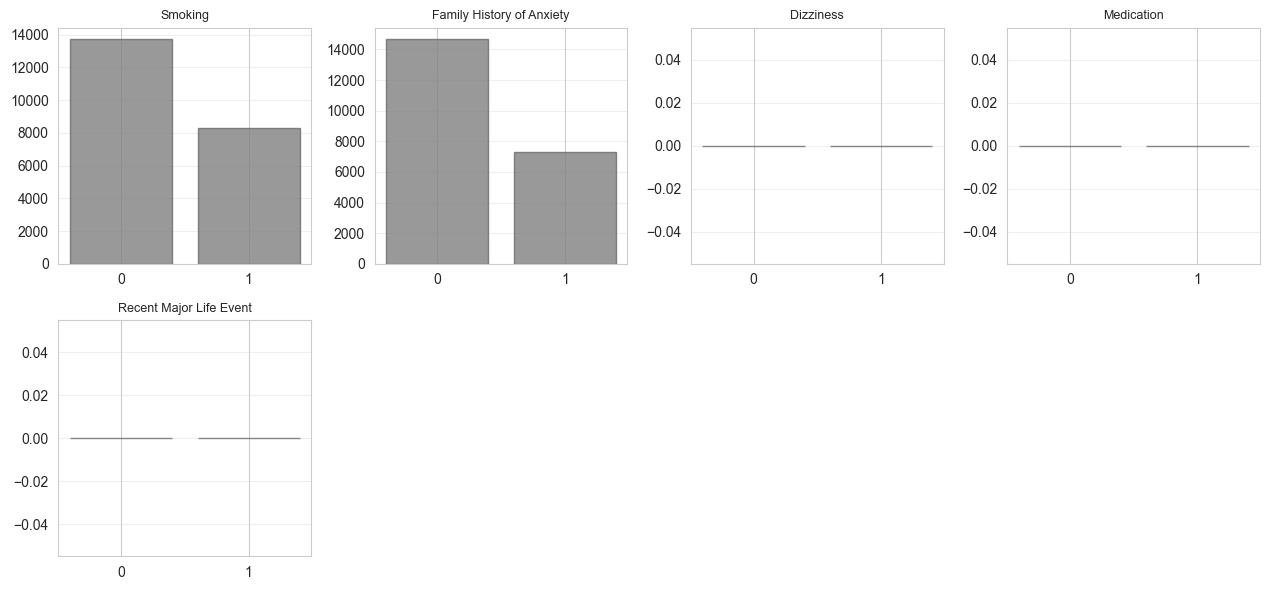

In [118]:
import math

def plot_binary_vars(df):
    bin_cols = [
        c for c in df.columns
        if pd.api.types.is_numeric_dtype(df[c]) and set(df[c].dropna().unique()).issubset({0, 1})
    ]
    if not bin_cols:
        print("No se encontraron columnas binarias (0/1) en df_var_obs.")
        return

    n = len(bin_cols)
    ncol = 4
    nrow = math.ceil(n / ncol)

    fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 3.2, nrow * 3))
    axes = axes.flatten()

    for ax, col in zip(axes, bin_cols):
        vc = df[col].value_counts(dropna=False).reindex([0, 1], fill_value=0)
        ax.bar(vc.index, vc.values, color="gray", edgecolor="dimgray", alpha=0.8)
        ax.set_xticks([0, 1])
        ax.set_title(col, fontsize=9)
        ax.grid(axis="y", alpha=0.3)

    for ax in axes[len(bin_cols):]:
        ax.axis("off")

    fig.tight_layout()
    plt.show()

plot_binary_vars(df_var_obs)


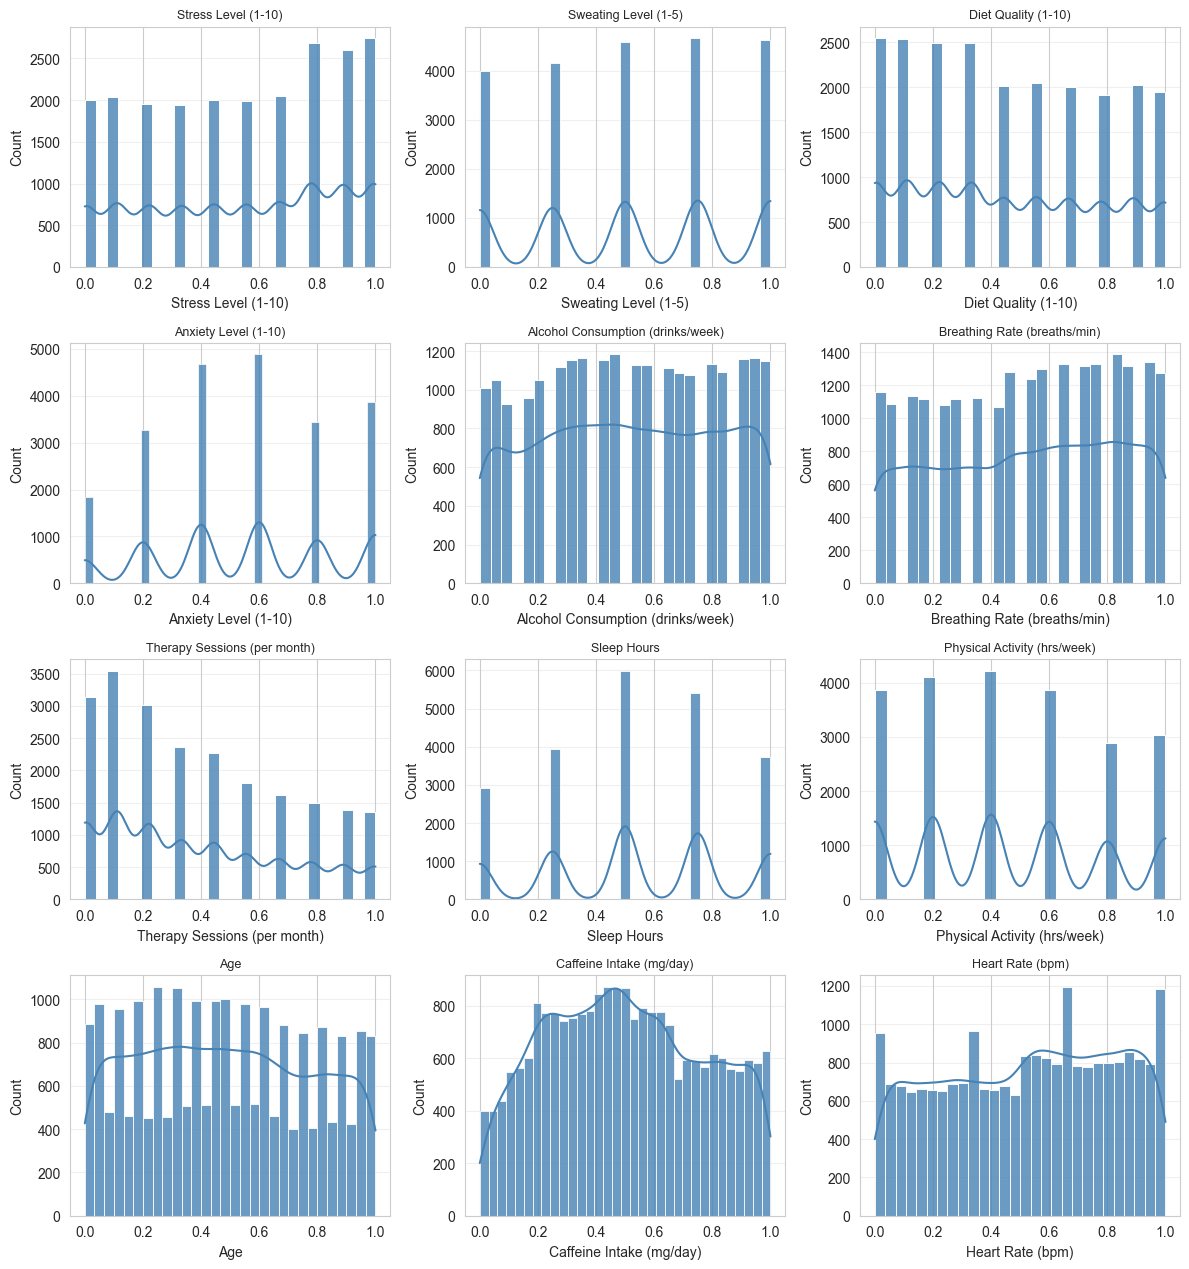

In [119]:
import math
import seaborn as sns

def plot_norm_vars(df):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    if len(num_cols) == 0:
        print("df_var_obs no tiene columnas numéricas.")
        return

    n = len(num_cols)
    ncol = 3
    nrow = math.ceil(n / ncol)

    fig, axes = plt.subplots(nrow, ncol, figsize=(ncol * 4, nrow * 3.2))
    axes = axes.flatten()

    for ax, col in zip(axes, num_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=ax, color="steelblue", edgecolor="white", alpha=0.8)
        ax.set_title(col, fontsize=9)
        ax.grid(axis="y", alpha=0.3)

    for ax in axes[len(num_cols):]:
        ax.axis("off")

    fig.tight_layout()
    plt.show()

plot_norm_vars(df_var_obs)

